In [6]:
import pandas as pd   # Import the pandas library for data manipulation
import numpy as np
import matplotlib.pyplot as plt    # Import the matplotlib library for plotting
import seaborn as sns 
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


# Understanding the data

In [8]:
data.shape

(100000, 9)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [11]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [12]:
data['gender'].unique(),data['smoking_history'].unique(),data['HbA1c_level'].unique()

(array(['Female', 'Male', 'Other'], dtype=object),
 array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
       dtype=object),
 array([6.6, 5.7, 5. , 4.8, 6.5, 6.1, 6. , 5.8, 3.5, 6.2, 4. , 4.5, 9. ,
        7. , 8.8, 8.2, 7.5, 6.8]))

In [13]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

BMI (Body Mass Index) is a measure of body fat based on weight and height.

HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. 

Blood glucose level refers to the amount of glucose in the bloodstream at a given time. 

In [14]:
data_geograph = data['smoking_history'].value_counts()
data_geograph

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [15]:
keys = data_geograph.keys().to_list()

In [16]:
count = data_geograph.to_list()

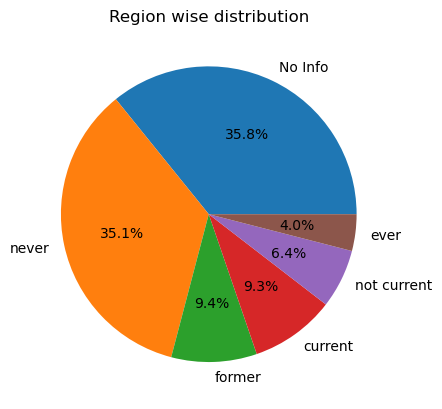

In [17]:
plt.pie(x=count,labels=keys,autopct='%1.1f%%')
plt.title('Region wise distribution')
plt.show()

([<matplotlib.axis.XTick at 0x214b26e29d0>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

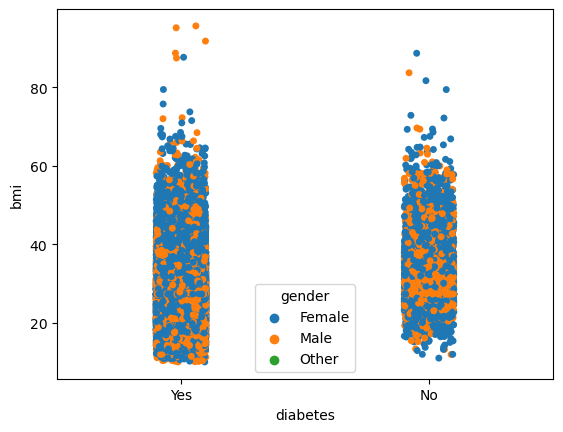

In [18]:
sns.stripplot(x=data.diabetes,y=data.bmi,data=data,hue=data.gender)
plt.xticks([0, 1], ['Yes', 'No'])  # Rename the x-ticks

([<matplotlib.axis.XTick at 0x214b2ecbd10>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

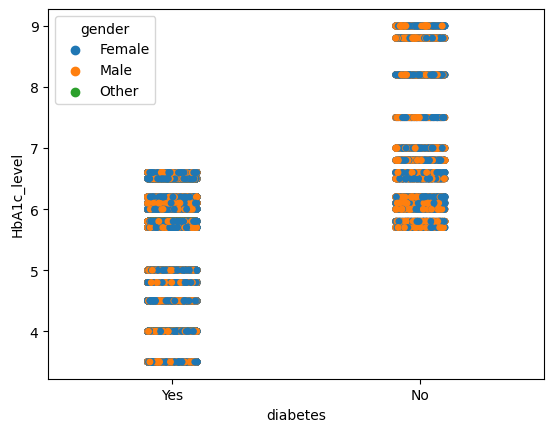

In [19]:
sns.stripplot(x=data.diabetes,y=data.HbA1c_level ,data=data,hue=data.gender)
plt.xticks([0, 1], ['Yes', 'No']) 

([<matplotlib.axis.XTick at 0x214b3eab610>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

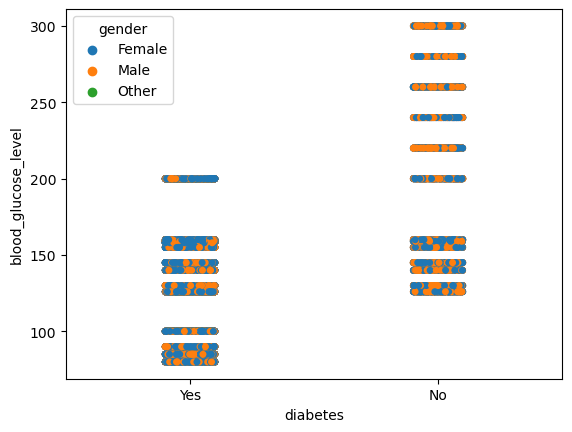

In [20]:
sns.stripplot(x=data.diabetes,y=data.blood_glucose_level ,data=data,hue=data.gender)
plt.xticks([0, 1], ['Yes', 'No']) 

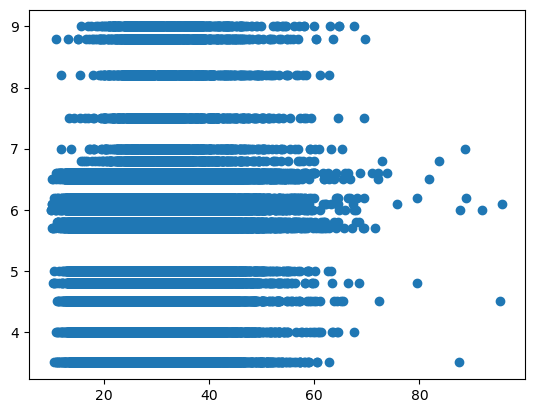

In [21]:
plt.scatter(data['bmi'],data['HbA1c_level'])
plt.show()

# Data Preprocessing

In [22]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [23]:
data.duplicated().sum() 

3854

In [24]:
data = data.drop_duplicates()

In [25]:
data.duplicated().sum()

0

In [26]:
data.drop(data.loc[data['gender']=='Other'].index)   #droping other from gender column

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [27]:
data.drop(data[(data['gender'] == 'Other')].index, inplace= True)

In [28]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [29]:
data['smoking_history'] = data['smoking_history'].replace('not current','former')

In [30]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever'], dtype=object)

# Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
gender = LabelEncoder()
smoke = LabelEncoder()
data['gender'] = gender.fit_transform(data.gender)
data['smoking_history'] = smoke.fit_transform(data.smoking_history)
data.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [33]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [34]:
relation = data[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].corr()
relation

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.028670,0.014196,0.078512,-0.082102,-0.023490,0.019928,0.017831,0.037837
age,-0.028670,1.000000,0.257297,0.238449,0.239762,0.344779,0.106708,0.114323,0.264918
hypertension,0.014196,0.257297,1.000000,0.119972,0.094921,0.148124,0.081443,0.084841,0.195696
heart_disease,0.078512,0.238449,0.119972,1.000000,0.023483,0.061382,0.068142,0.070838,0.170701
smoking_history,-0.082102,0.239762,0.094921,0.023483,1.000000,0.187931,0.035545,0.038996,0.089882
bmi,-0.023490,0.344779,0.148124,0.061382,0.187931,1.000000,0.084443,0.092593,0.214951
HbA1c_level,0.019928,0.106708,0.081443,0.068142,0.035545,0.084443,1.000000,0.171717,0.406446
blood_glucose_level,0.017831,0.114323,0.084841,0.070838,0.038996,0.092593,0.171717,1.000000,0.424366
diabetes,0.037837,0.264918,0.195696,0.170701,0.089882,0.214951,0.406446,0.424366,1.000000


# Splitting into training and testing

In [68]:
x = data[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history','bmi', 
          'HbA1c_level', 'blood_glucose_level']]          #dependent data
y = data[['diabetes']]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=70)

In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((67289, 8), (28839, 8), (67289, 1), (28839, 1))

# Training the model using logistics regression (i.e) Classification model

In [38]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [39]:
sigmoid(-10)

4.5397868702434395e-05

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model_lr = LogisticRegression(max_iter=700)

In [42]:
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=700)

In [43]:
y_pred = model_lr.predict(X_test)     # this is testing the data
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9580082527133396

# SGDClassifier

In [45]:
from sklearn.linear_model import SGDClassifier

In [46]:
model_lr1 = SGDClassifier()

In [47]:
model_lr1.fit(X_train,y_train)

SGDClassifier()

In [48]:
y_pred1 = model_lr1.predict(X_test)     
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
accuracy1 = accuracy_score(y_test,y_pred1)
accuracy1

0.9531883907208988

# Confusion Matrix for logistic and SGDC

In [50]:
from sklearn.metrics import confusion_matrix
conf_mat_log = confusion_matrix(y_test,y_pred)
conf_mat_log

array([[26056,   238],
       [  973,  1572]], dtype=int64)

In [51]:
conf_mat_sgdc = confusion_matrix(y_test,y_pred1)
conf_mat_sgdc

array([[26230,    64],
       [ 1286,  1259]], dtype=int64)

# Classification Report for logistic and SGDC

In [52]:
from sklearn.metrics import classification_report

In [53]:
target_names = ['no Diabetes','Diabetes']
class_log_report = classification_report(y_test, y_pred,target_names=target_names)
print(class_log_report)

              precision    recall  f1-score   support

 no Diabetes       0.96      0.99      0.98     26294
    Diabetes       0.87      0.62      0.72      2545

    accuracy                           0.96     28839
   macro avg       0.92      0.80      0.85     28839
weighted avg       0.96      0.96      0.95     28839



The precision for this model is 95% which means 5% of the people predicted to have diabetes do not have it.
Recall of the model is 96% an 45 of the peopl do not have diabetes but model said they have.

In [54]:
target_names = ['no Diabetes','Diabetes']
class_sgdc_report = classification_report(y_test, y_pred,target_names=target_names)
print(class_sgdc_report)

              precision    recall  f1-score   support

 no Diabetes       0.96      0.99      0.98     26294
    Diabetes       0.87      0.62      0.72      2545

    accuracy                           0.96     28839
   macro avg       0.92      0.80      0.85     28839
weighted avg       0.96      0.96      0.95     28839



# Recursive Feature Elimination (logistic Regression)

In [55]:
from sklearn.feature_selection import RFE

In [61]:
rfe = RFE(model_lr, step=1, importance_getter='auto',verbose=0, n_features_to_select=None)
rfe = rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True False False  True False]
[1 4 1 1 2 3 1 5]


This array corresponds to whether each feature was selected as important (True) or not (False).

Features with a rank of 1 were selected by RFE. The other features were ranked based on how important they were, with 2 being the next most important, then 3, and so on.

# RFE with Cross Validation

In [62]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [63]:
cv = StratifiedKFold(5)

In [66]:
rfecv = RFECV(estimator=model_lr,cv = cv, step=1, scoring='accuracy',min_features_to_select=5)
rfecv = rfecv.fit(x,y)
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 8


# Variance Threshold

In [67]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(x)   # x is independent variable 

array([[  0.  ,  80.  ,   0.  , ...,  25.19,   6.6 , 140.  ],
       [  0.  ,  54.  ,   0.  , ...,  27.32,   6.6 ,  80.  ],
       [  1.  ,  28.  ,   0.  , ...,  27.32,   5.7 , 158.  ],
       ...,
       [  1.  ,  66.  ,   0.  , ...,  27.83,   5.7 , 155.  ],
       [  0.  ,  24.  ,   0.  , ...,  35.42,   4.  , 100.  ],
       [  0.  ,  57.  ,   0.  , ...,  22.43,   6.6 ,  90.  ]])